# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA as ARIMA_new
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#LOADING THE DATASETS

Got the datasets from Kaggle datsets Covid_19 and country_wise datasets

In [4]:
df =pd.read_csv("covid _ 19 project.csv")
df2 = pd.read_csv("Country wise dataset.csv")

In [5]:
#Checking the top 5 rows of the covid 19 dataset
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [6]:
#the top 5 rows of the country_wise dataset
df2.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [72]:
#Unique values of the covid_19 regions
df["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [73]:
#Checking the Statistical Analysis
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [74]:
#Checking the Statistical Analysis
df2.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


Observations
From the dataset, there 187 observations.
The confirmed cases ranges from 10 to 4290259.
The average number of confirmed cases is far from the 75% percentile.

In [75]:
#Checking the null values
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [76]:
#Checking overall information of covid_19 dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [77]:
#removing province column because of many null values
df.drop('Province/State',axis=1,inplace=True)

In [78]:
df.isnull().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [79]:


# Group data by WHO Region and sum the relevant columns
who_region = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()



#EXPLORATORY DATA ANALYSIS FOR COVID 19 DATASET

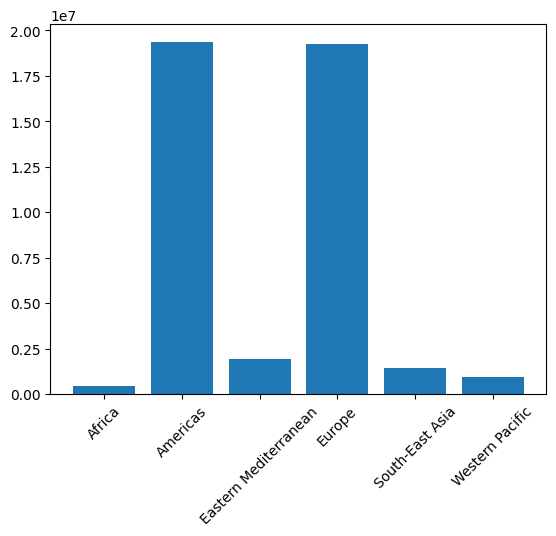

In [80]:
# Create a bar plot for Deaths for covid 19 dataset
fig1 = plt.bar(who_region['WHO Region'], who_region["Deaths"], width = 0.8)
plt.xticks(rotation=45)
plt.show()


OBSERVATION

It can be seen that America and Europe has the highest death rate with Africa having the lowest death rate

In [81]:
# 1. Summarizing the key statistics of the dataset
summary_stats = df.describe(include="all")

# 2. Converting 'Date' to datetime format for time-series analysis
df['Date'] = pd.to_datetime(df['Date'])

# 3. Checking for missing values and handling them
missing_values = df.isnull().sum()


# Rechecking for missing values after handling
missing_values_after = df.isnull().sum()

# 4. Summarizing the global trends over time
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()





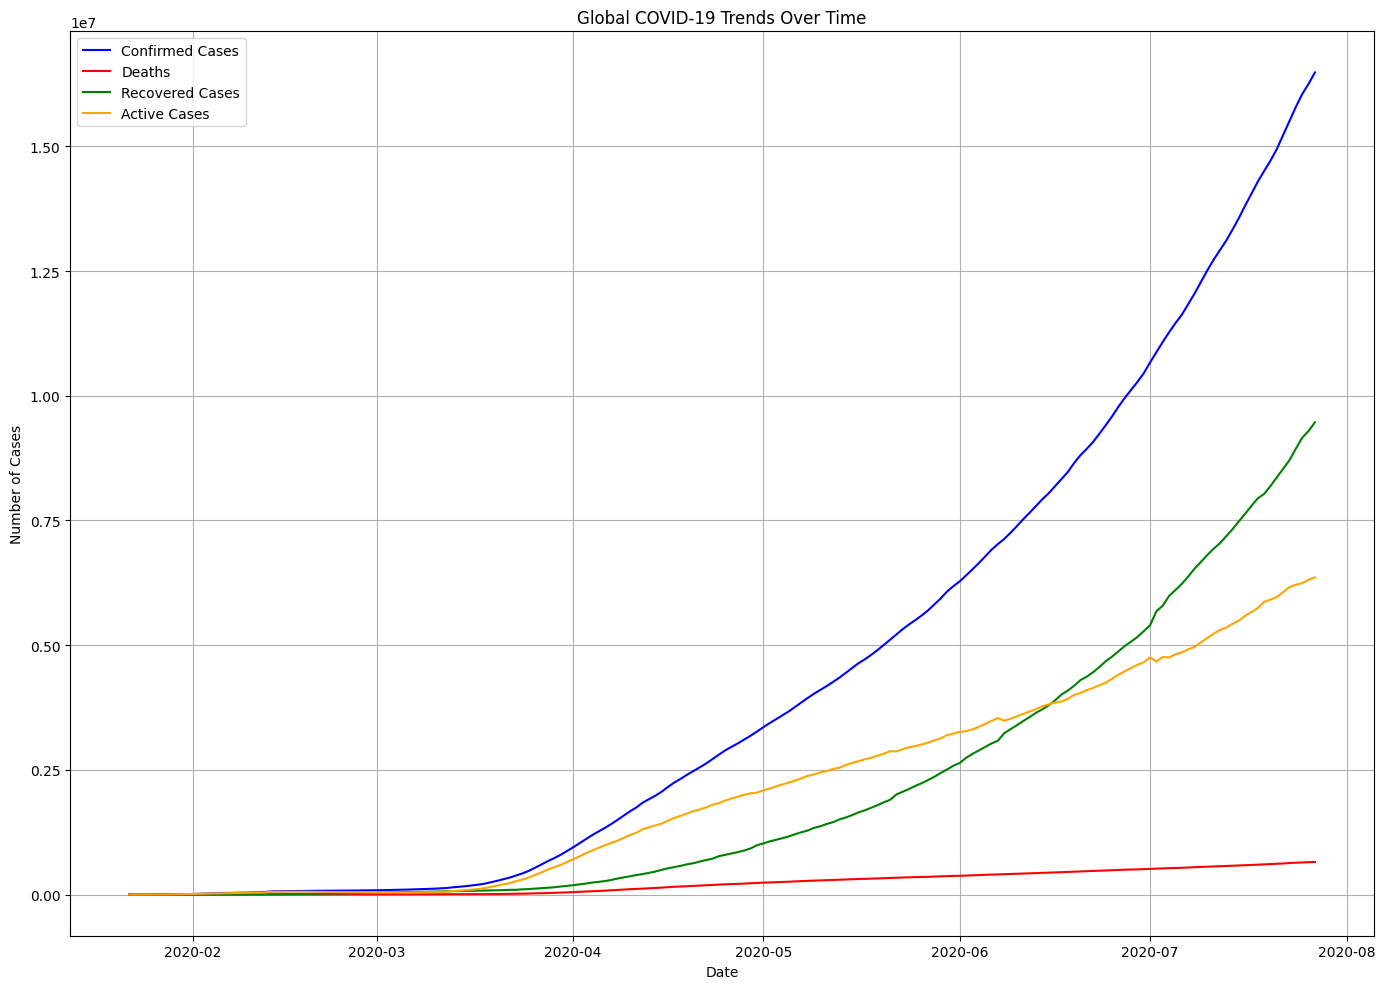

(       Country/Region           Lat          Long        Date     Confirmed  \
 count           49068  49068.000000  49068.000000       49068  4.906800e+04   
 unique            187           NaN           NaN         188           NaN   
 top             China           NaN           NaN  2020-01-22           NaN   
 freq             6204           NaN           NaN         261           NaN   
 mean              NaN     21.433730     23.528236         NaN  1.688490e+04   
 std               NaN     24.950320     70.442740         NaN  1.273002e+05   
 min               NaN    -51.796300   -135.000000         NaN  0.000000e+00   
 25%               NaN      7.873054    -15.310100         NaN  4.000000e+00   
 50%               NaN     23.634500     21.745300         NaN  1.680000e+02   
 75%               NaN     41.204380     80.771797         NaN  1.518250e+03   
 max               NaN     71.706900    178.065000         NaN  4.290259e+06   
 
                Deaths     Recovered  

In [82]:
# 5. Preparing for visualizations

plt.figure(figsize=(14, 10))
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths', color='red')
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered Cases', color='green')
plt.plot(global_trends.index, global_trends['Active'], label='Active Cases', color='orange')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot and return key stats and cleaned data
plt.show()

summary_stats, missing_values, missing_values_after, global_trends.tail()

OBSERVATION

It can be noted that confirmed cases was very high

In [83]:
#splitting the year column into month

df["Month"] = df["Date"].dt.month

In [84]:
df["Month"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [85]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1


In [86]:
# Filter data for specific countries
Regions = ['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia']
Region_data = df[df['WHO Region'].isin(Regions)]

# Aggregate by Date and Country
Region_trends = Region_data.groupby(['Month', 'WHO Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

Region_trends.head(20)


,Month,WHO Region,Confirmed,Deaths,Recovered,Active
0,1,Africa,0,0,0,0
1,1,Americas,50,0,0,50
2,1,Eastern Mediterranean,12,0,0,12
3,1,Europe,58,0,0,58
4,1,South-East Asia,108,0,24,84
5,1,Western Pacific,38306,889,814,36603
6,2,Africa,7,0,0,7
7,2,Americas,636,1,88,547
8,2,Eastern Mediterranean,2331,171,361,1799
9,2,Europe,6094,121,637,5336


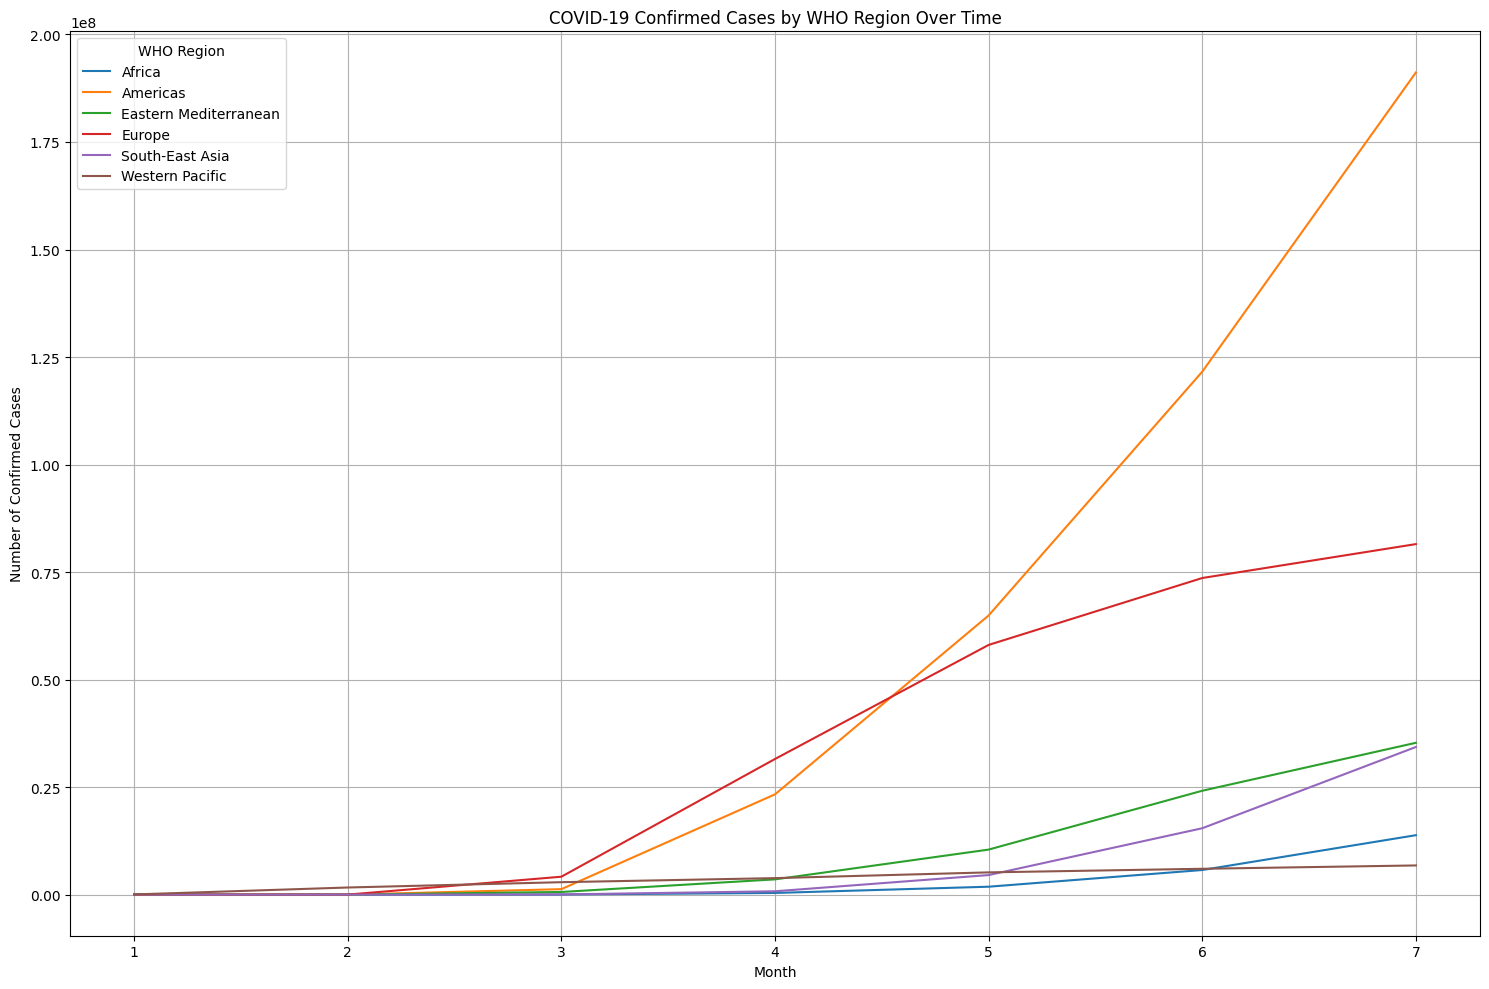

In [87]:


# Assuming Region_trends is your DataFrame

plt.figure(figsize=(15, 10))  # Adjust figure size if needed

# Loop through each WHO Region to plot separate lines
for region in Region_trends['WHO Region'].unique():
    region_df = Region_trends[Region_trends['WHO Region'] == region]
    plt.plot(region_df['Month'], region_df['Confirmed'], label=region)  # Plotting Confirmed cases

# Customize the plot
plt.title('COVID-19 Confirmed Cases by WHO Region Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(Region_trends['Month'].unique())  # Set x-axis ticks to be months
plt.legend(title='WHO Region')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Total Deaths by Continent'}, xlabel='WHO Region', ylabel='Deaths'>

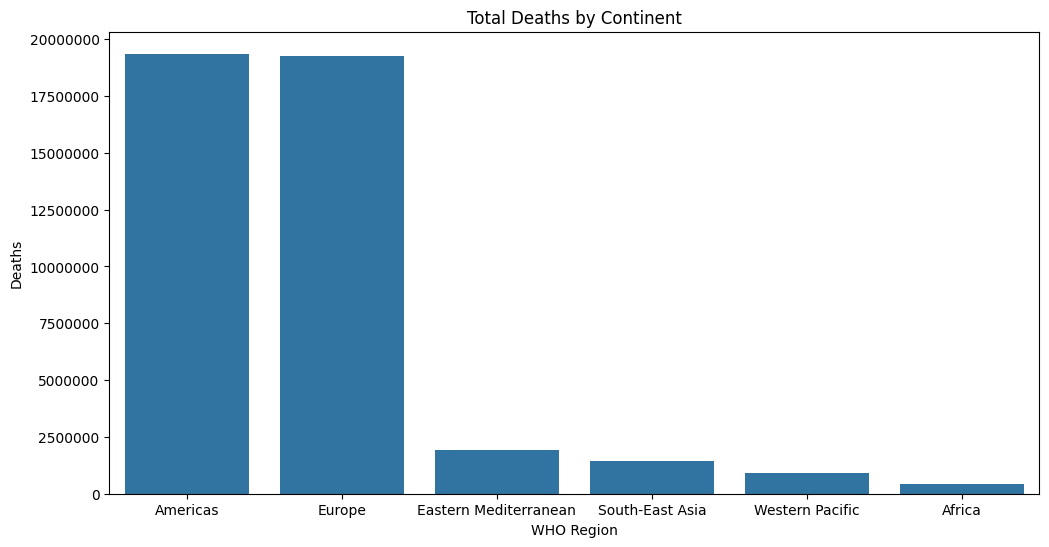

In [88]:
plt.figure(figsize=(12,6))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Total Deaths by Continent')
gathered_global_death = df.groupby('WHO Region')['Deaths'].sum().reset_index().sort_values(by='Deaths', ascending=False)
sns.barplot(data=gathered_global_death, x='WHO Region', y='Deaths')

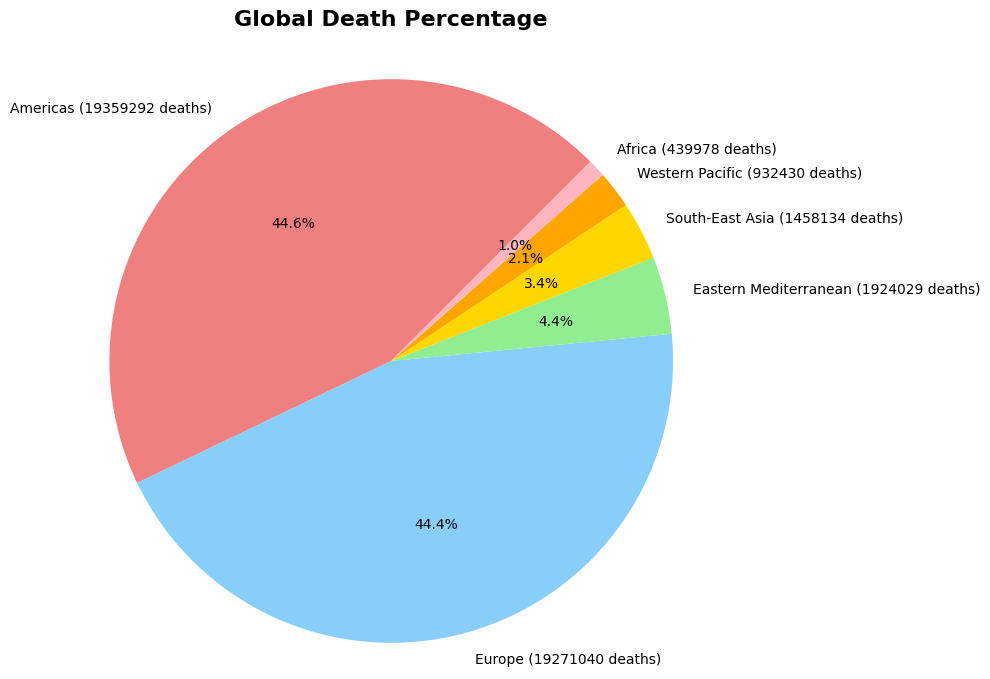

In [89]:
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'orange', 'lightpink']
plt.figure(figsize=(8, 8))
plt.title('Global Death Percentage', pad=20, fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.pie(gathered_global_death['Deaths'],
        labels=[f"{region} ({deaths} deaths)" for region, deaths in zip(gathered_global_death['WHO Region'], gathered_global_death['Deaths'])],
        autopct='%1.1f%%',
        startangle=45,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 0})
plt.axis('equal')
plt.show()

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EXPLORATORY DATA ANALYSIS OF THE COUNTRY WISE DATASET

<Axes: xlabel='Confirmed', ylabel='Count'>

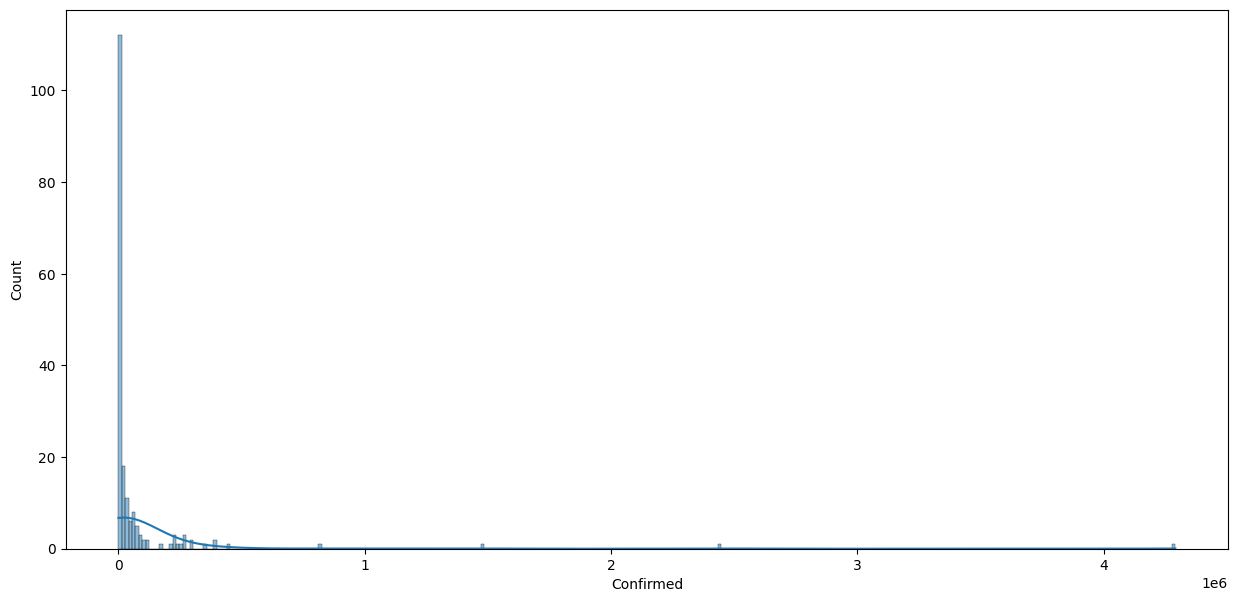

In [92]:
plt.figure(figsize=(15,7)) #Shows the size of the graph
sns.histplot(data= df2, x='Confirmed', kde= True)

<Axes: xlabel='Deaths', ylabel='Count'>

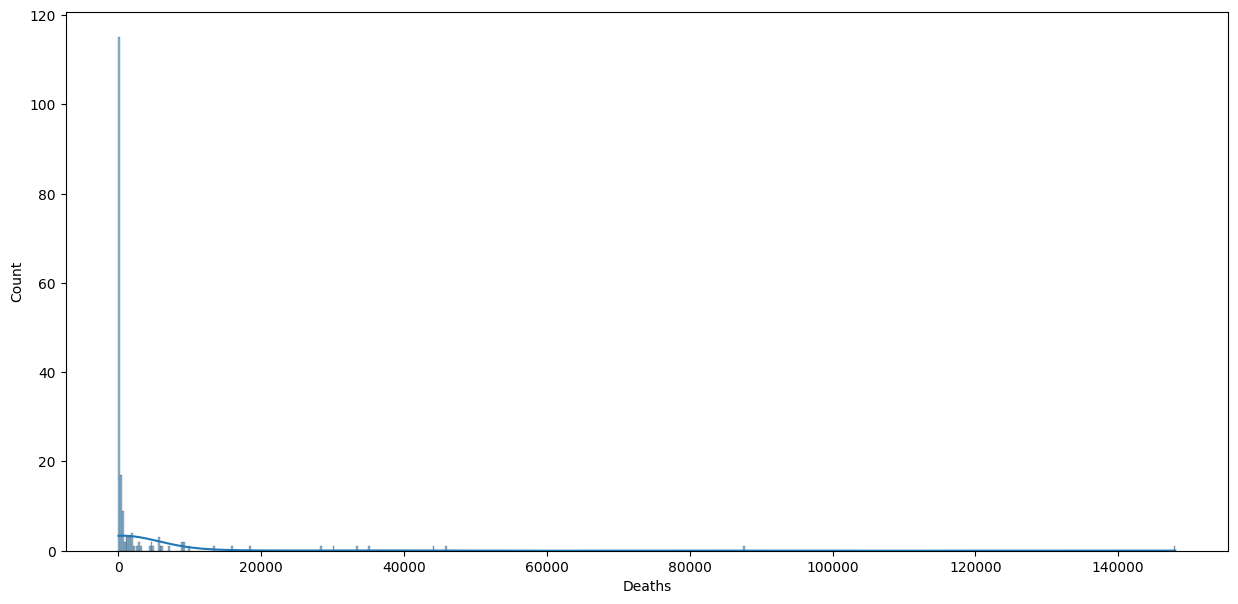

In [93]:
plt.figure(figsize=(15,7))
sns.histplot(data= df2, x='Deaths', kde= True)

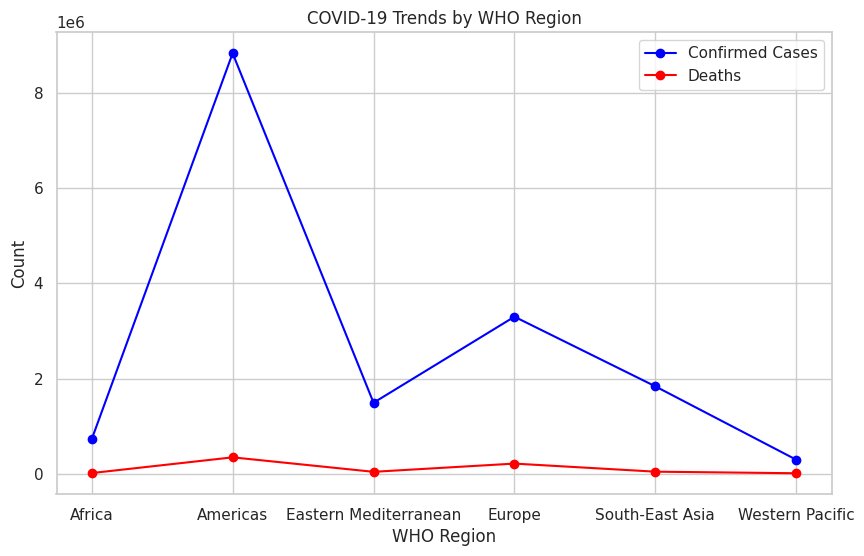

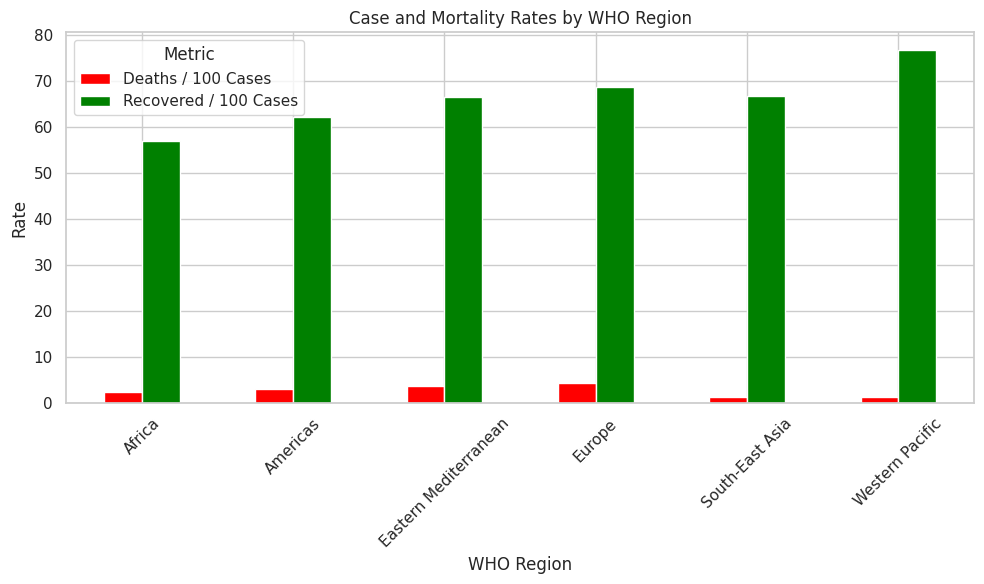

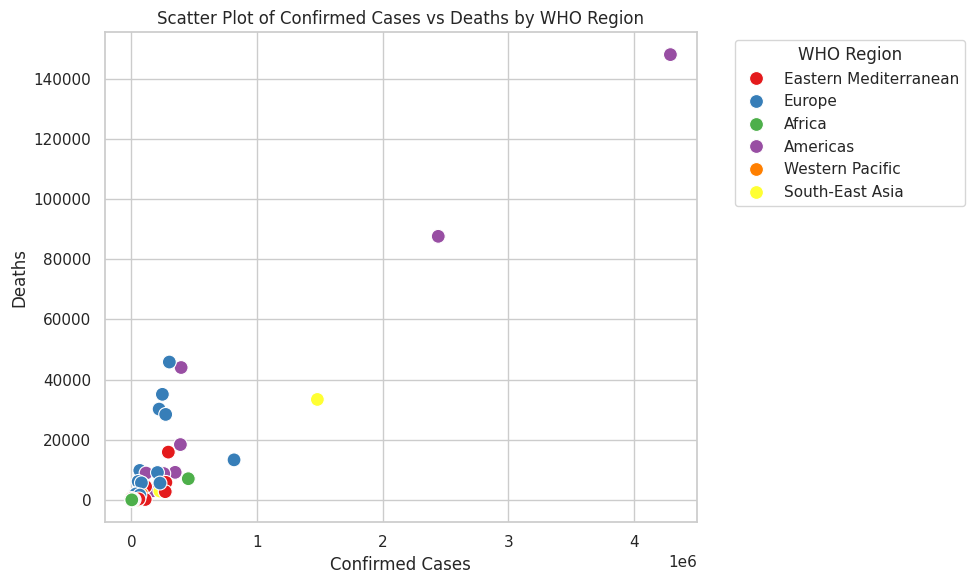

In [96]:

sns.set(style="whitegrid", palette="muted")

# Sample data preparation: Aggregating metrics over WHO regions
region_summary = df2.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Line Plot: Case and Mortality Trends (replace with time-series data if available)
plt.figure(figsize=(10, 6))
plt.plot(region_summary.index, region_summary['Confirmed'], label='Confirmed Cases', marker='o', color='blue')
plt.plot(region_summary.index, region_summary['Deaths'], label='Deaths', marker='o', color='red')
plt.title('COVID-19 Trends by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Bar Chart: Case and Mortality Rates by WHO Region
rates = df2.groupby('WHO Region')[['Deaths / 100 Cases', 'Recovered / 100 Cases']].mean()
rates.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])
plt.title('Case and Mortality Rates by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Rate')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot: Relationship between Confirmed Cases and Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Confirmed', y='Deaths', hue='WHO Region', palette='Set1', s=100)
plt.title('Scatter Plot of Confirmed Cases vs Deaths by WHO Region')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [106]:
X = df2[['Confirmed','Deaths']]  # Assuming 'Confirmed' and 'Deaths' are your features
y = df2['Recovered']  # Assuming 'Recovered' is your target

#MODEL DEVELOPMENT

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

pred,mae, mse, rmse, r2
print('mae', mae)
print('mse', mse)
print('rmse', rmse)
print('r2', r2)

mae 20315.545329156226
mse 4416478298.76205
rmse 66456.58958118487
r2 0.5789453507166156


#ACTUAL VS PREDICTED PLOT

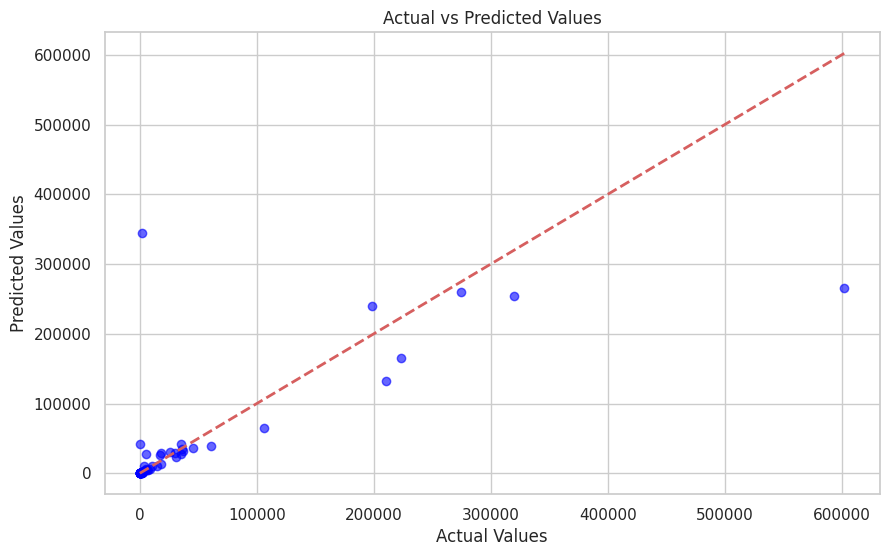

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("Actual vs predicted.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [117]:
# Time-Series Modeling (ARIMA)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
model = ARIMA_new(train_df['Confirmed'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_df))
mse = mean_squared_error(test_df['Confirmed'], forecast)
print(f'RMSE: {np.sqrt(mse)}')




# Classification Modeling (Random Forest)
X = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]
y = np.where(df['Confirmed'] > df['Recovered'], 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

RMSE: 137939.4971653952
RMSE: 137939.4971653952
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2435
           1       1.00      1.00      1.00      7379

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814

Confusion Matrix:
[[2435    0]
 [   0 7379]]
